<a href="https://colab.research.google.com/github/PoojanSheth29/CNBST/blob/main/Stacked_Conv_DeNoisiy_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras


In [ ]:
(x_train, _),(x_test, _) = keras.datasets.mnist.load_data()

In [ ]:
x_tain = x_train/255
x_test = x_test/255

# **Stacked Encoder :**
1st Encoder and 2nd decoder and then stack it


Image -> 100 -> 30 -> 100 -> Image -> Reshape

In [ ]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
])

The decoder is the same but in the opposite order. Note that keras needs to know the input shape at this point. The input shape of the decoder is the shape of z, also called as zDim

In [ ]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=[30]),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28]) 
])

In [ ]:
# stack them for training

stacked_autoencoder = keras.models.Sequential([encoder,decoder])


In [ ]:
stacked_autoencoder.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [ ]:
history = stacked_autoencoder.fit(x_train,x_train,epochs=10,validation_data=[x_test,x_test])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: -493.2743 - accuracy: 0.1761 - val_loss: -500.8810 - val_accuracy: 0.1576
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: -493.0233 - accuracy: 0.1655 - val_loss: -500.7693 - val_accuracy: 0.1750
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: -492.8650 - accuracy: 0.1744 - val_loss: -497.7415 - val_accuracy: 0.1814
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: -489.8671 - accuracy: 0.1685 - val_loss: -497.7050 - val_accuracy: 0.1777
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: -489.9997 - accuracy: 0.1703 - val_loss: -497.2563 - val_accuracy: 0.1634
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: -489.6667 - accuracy: 0.1612 - val_loss: -497.2533 - val_accuracy: 0.1748
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: -489.6410 - accuracy: 0.

In [ ]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


1/1 [==============================] - 0s 25ms/step


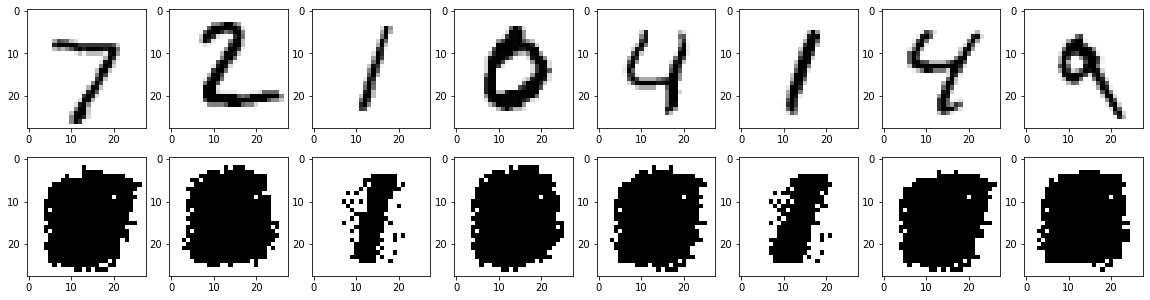

In [ ]:
figsize(20,5)
for i in range(8):
  subplot(2,8,i+1)
  pred = stacked_autoencoder.predict(x_test[i].reshape((1,28,28)))
  imshow(x_test[i],cmap='binary')

  subplot(2,8,i+8+1)
  imshow(pred.reshape((28,28)),cmap='binary')

1/1 [==============================] - 0s 54ms/step


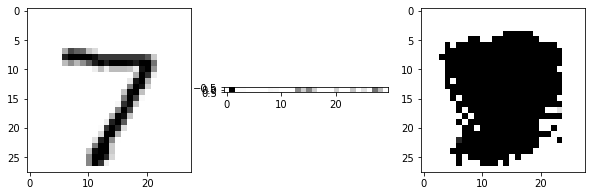

In [ ]:
#Latent Encoder means je encoding thayu 6e ee kevu dekhaii
i = 0
figsize(10,5)
subplot(1,3,1)
imshow(x_test[i],cmap='binary')

subplot(1,3,2)
latent_vector = encoder.predict(x_test[i].reshape((1,28,28)))
imshow(latent_vector,cmap='binary')


subplot(1,3,3)
predi = decoder.predict(latent_vector)
imshow(predi.reshape(28,28),cmap='binary')

# **Convolution AutoEncoder**

In [ ]:
encoder = keras.models.Sequential([
    keras.layers.Reshape([28,28,1],input_shape=[28,28]),
    keras.layers.Conv2D(16,kernel_size=(3,3), padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32,kernel_size=(3,3), padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64,kernel_size=(3,3), padding='same',activation='relu'),
    keras.layers.MaxPool2D(pool_size=2)
])

In [ ]:
## here we do deconvolution so we dont take input shape in decoder like stacked autoencoder here there is different

encoder.predict(x_test[0].reshape(1,28,28)).shape

'''1/1 [==============================] - 5s 5s/step
(1, 3, 3, 64)'''
# shape for decoder layer

1/1 [==============================] - 5s 5s/step


(1, 3, 3, 64)

In [ ]:
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32,kernel_size=(3,3), strides=2, padding='valid',activation='relu',input_shape=[3,3,64]),
    keras.layers.Conv2DTranspose(16,kernel_size=(3,3), strides=2, padding='same',activation='relu'),
    keras.layers.Conv2DTranspose(1,kernel_size=(3,3), strides=2, padding='same',activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

In [ ]:
conv_autoencoder = keras.models.Sequential([encoder,decoder])

In [ ]:
conv_autoencoder.compile(loss='binary_crossentropy',metrics='accuracy',optimizer='adam')

In [ ]:
history = conv_autoencoder.fit(x_train,x_train,epochs=10,validation_data=(x_test,x_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: -499.0944 - accuracy: 0.0761 - val_loss: -510.5506 - val_accuracy: 0.1117
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: -503.5623 - accuracy: 0.1489 - val_loss: -510.9388 - val_accuracy: 0.1320
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: -503.8112 - accuracy: 0.1680 - val_loss: -511.0707 - val_accuracy: 0.1837
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: -503.9457 - accuracy: 0.1805 - val_loss: -511.2394 - val_accuracy: 0.1914
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: -504.0571 - accuracy: 0.1937 - val_loss: -511.3536 - val_accuracy: 0.2036
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: -504.1455 - accuracy: 0.2014 - val_loss: -511.3788 - val_accuracy: 0.2199
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: -504.2324 - accuracy: 

In [ ]:

%pylab inline

Populating the interactive namespace from numpy and matplotlib


NameError: ignored

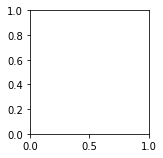

In [ ]:
figsize(20,5)
for i in range(8):
  subplot(2,8,i+1)
  pred = conv_autoencoder.predict(x_test[i].reshape((1,28,28)))
  imshow(x_test[i],cmap='binary')

  subplot(2,8,i+8+1)
  imshow(pred.reshape((28,28)),cmap='binary')

Highly close to original image
ConvolutionAutoEncoder is better than StackAutoEncoder

# **Denoising AutoEncoders**

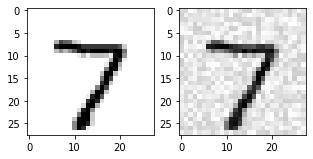

In [ ]:
import numpy as np

figsize(5,10)
subplot(1,2,1)
imshow(x_test[0],cmap='binary')

subplot(1,2,2)
noise = np.random.random((28,28))/4 ## noise added
imshow(x_test[0]+ noise,cmap='binary')

In [ ]:
#for removing noise also we need to make encoders and decoders
# in denoising not necessary to decrease size at every encoders so badha ma karvuj necessary nahi. 
#ek bottleneck hovu joiiye bus like ahiya 30 6e

encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(30,activation='relu'),
    
])

In [ ]:
decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation='relu',input_shape=[30]),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28]),
    
])

In [ ]:
denoising_auto = keras.models.Sequential([encoder,decoder])

In [ ]:
denoising_auto.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
# noise add karilu training and testing set

x_train_noise = x_train + (np.random.random((x_train.shape))/4)
x_test_noise = x_test + (np.random.random((x_test.shape))/4)


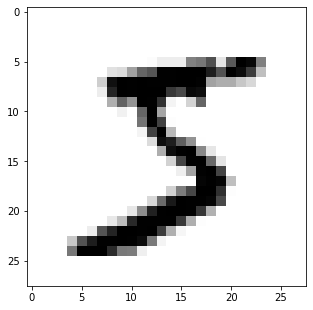

In [ ]:
imshow(x_train_noise[0],cmap='binary')

In [ ]:
hisotry = denoising_auto.fit(x_train_noise,x_train,epochs=10,validation_data=[x_test_noise,x_test])   #so model.fit(train&noise,train)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: -457.6999 - val_loss: 1.1883
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: -459.1171 - val_loss: 1.1878
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: -459.0245 - val_loss: 1.2015
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: -459.0227 - val_loss: 1.2015
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: -459.0227 - val_loss: 1.2014
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: -459.0229 - val_loss: 1.2014
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: -459.0224 - val_loss: 1.2013
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: -459.0226 - val_loss: 1.2012
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: -459.0222 - val_loss: 1.2012
Epoch 10/10
1875/1875 [==============================] 

1/1 [==============================] - 0s 15ms/step


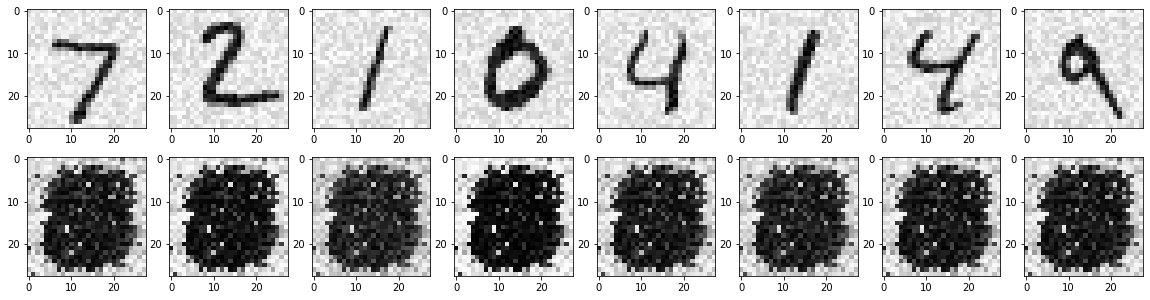

In [ ]:
figsize(20,5)
for i in range(8):
  subplot(2,8,i+1)
  imshow(x_test_noise[i],cmap='binary')

  subplot(2,8,i+8+1)
  pred = denoising_auto.predict(x_test_noise[i].reshape((1,28,28)))
  imshow(pred.reshape((28,28)),cmap='binary')